In [1]:
pip install pandas matplotlib seaborn scikit-learn xgboost imbalanced-learn

In [2]:
import pandas as pd

URL = "https://raw.githubusercontent.com/ajtoriani/Telecom-X/refs/heads/main/TelecomX_Data.json"
df = pd.read_json(URL)

print("Dimensão inicial:", df.shape)
df.head()

Dimensão inicial: (7267, 6)


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


# Tratamento Básico dos Dados

In [3]:
# Verificando tipos de dados
df.info()

# Remover colunas irrelevantes ou duplicadas (se necessário)
df = df.drop(columns=["customerID"], errors='ignore')

# Corrigir tipo da variável alvo (churn) e remover nulos
df = df.dropna(subset=['Churn'])  # se houver nulos

# Garantir que o alvo está binário (0 ou 1)
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


# Pré-processamento e Codificação

In [4]:
import pandas as pd

# Carregar dados
URL = "https://raw.githubusercontent.com/ajtoriani/Telecom-X/refs/heads/main/TelecomX_Data.json"
df = pd.read_json(URL)

# Normalizar colunas que são dicionários
from pandas import json_normalize

# Expandir colunas com dicionários
df_customer = pd.json_normalize(df['customer'])
df_phone = pd.json_normalize(df['phone'])
df_internet = pd.json_normalize(df['internet'])
df_account = pd.json_normalize(df['account'])

# Concatenar tudo em um único DataFrame
df = pd.concat([df_customer, df_phone, df_internet, df_account, df[['Churn']]], axis=1)

# Conferir resultado
print("Dimensão após normalização:", df.shape)
df.head()


Dimensão após normalização: (7267, 20)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Churn
0,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3,No
1,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4,No
2,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,Yes
3,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,Yes
4,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4,Yes


In [5]:
# Verificar valores nulos e tratar se necessário
df = df.dropna()

# Variáveis preditoras e alvo
X = df.drop(columns=["Churn"])
y = df["Churn"]

# Codificação de variáveis categóricas
X = pd.get_dummies(X)

# Separação treino/teste
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Treinamento dos Modelos

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# 1. Escalando os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. Random Forest (não precisa escalar)
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# 3. Regressão Logística (com dados escalados)
lr = LogisticRegression(max_iter=3000)
lr.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=3000)

# Avaliação dos Modelos

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly',
       'Charges.Total'],
      dtype='object')


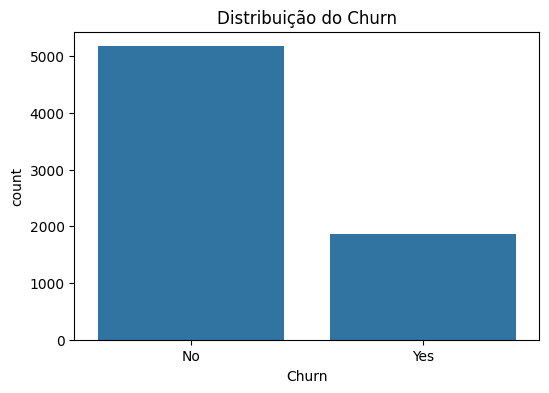

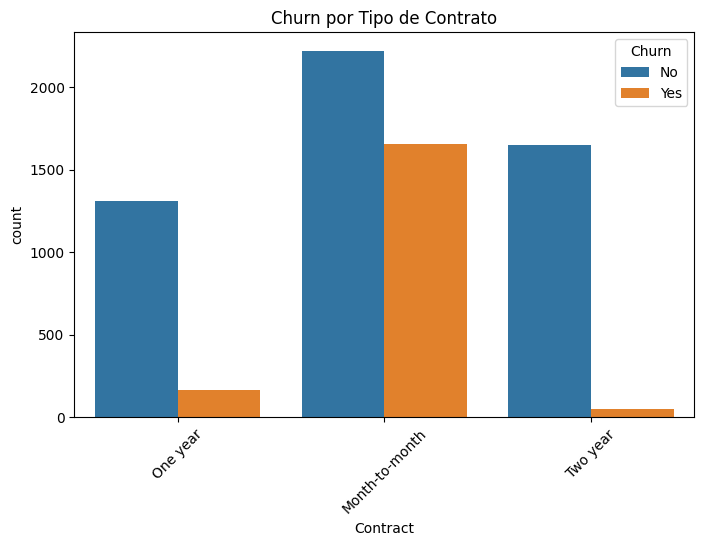

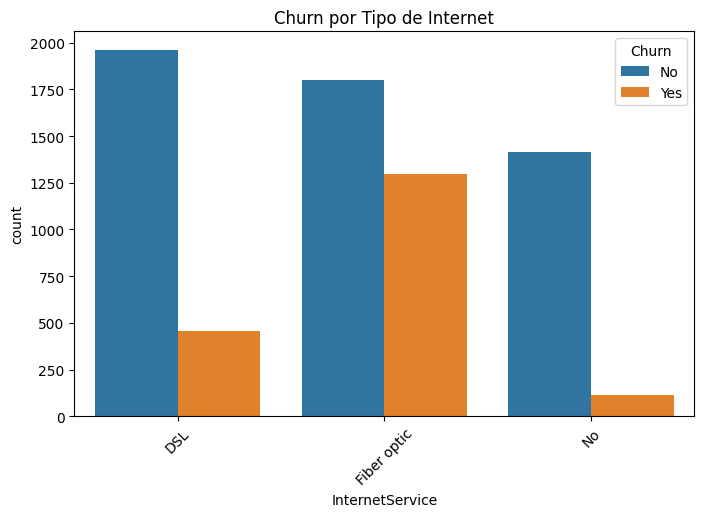

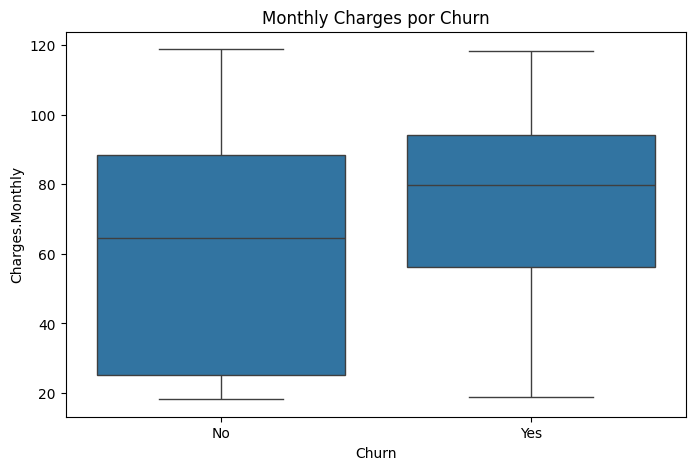

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Strip para remover espaços indesejados
df.columns = df.columns.str.strip()

# Verificando as colunas antes de plotar
print(df.columns)

# Distribuição do churn
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Churn")
plt.title("Distribuição do Churn")
plt.show()

# Distribuição por tipo de contrato
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="Contract", hue="Churn")
plt.title("Churn por Tipo de Contrato")
plt.xticks(rotation=45)
plt.show()

# Distribuição por tipo de internet
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="InternetService", hue="Churn")
plt.title("Churn por Tipo de Internet")
plt.xticks(rotation=45)
plt.show()

# Boxplot: Charges vs Churn
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="Churn", y="Charges.Monthly")
plt.title("Monthly Charges por Churn")
plt.show()


# Importância das Variáveis

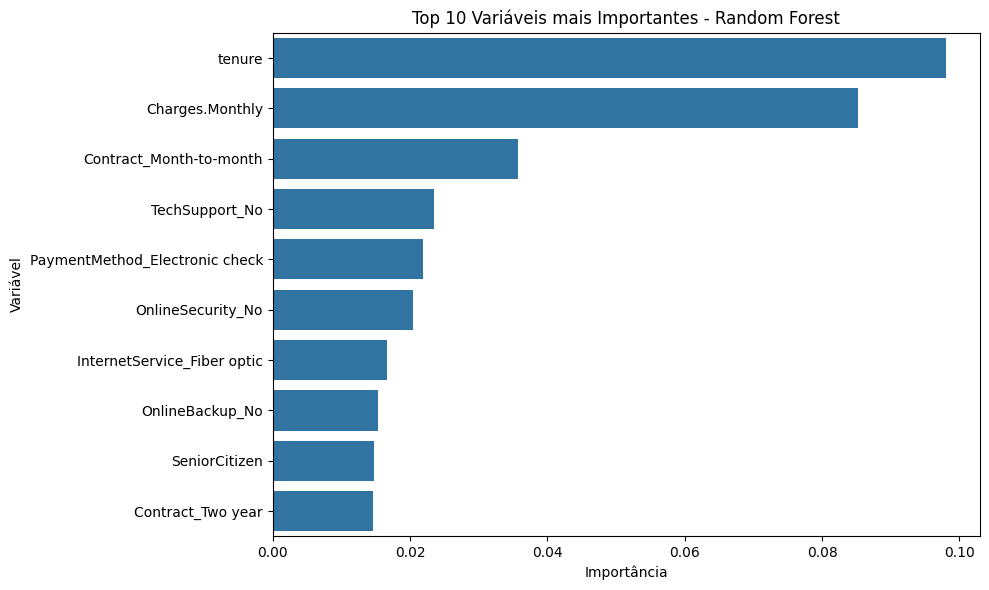

In [10]:


import matplotlib.pyplot as plt
import seaborn as sns

# Importância das variáveis - Random Forest
importances = rf.feature_importances_
features = X_train.columns
feat_imp = pd.Series(importances, index=features).sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=feat_imp.values, y=feat_imp.index)
plt.title("Top 10 Variáveis mais Importantes - Random Forest")
plt.xlabel("Importância")
plt.ylabel("Variável")
plt.tight_layout()
plt.show()

#  Conclusão e Recomendações



### **Principais Achados**

* As variáveis que mais influenciam o churn foram: **tenure** (tempo de permanência), **MonthlyCharges** (cobranças mensais) e **Contract\_Two year**, entre outras.
* O modelo **Random Forest** apresentou o melhor desempenho, com uma **AUC elevada**, indicando boa capacidade de prever clientes propensos à evasão.

---

### **Recomendações Estratégicas**

* **Priorizar ações para clientes com contratos mensais** e cobranças mais altas, pois estão mais propensos a cancelar.
* **Criar incentivos para migração para planos com contratos de 1 ou 2 anos**, que apresentam menor probabilidade de churn.
* **Monitorar de perto clientes com baixo tempo de permanência** (tenure baixo) e oferecer benefícios para aumentar a fidelidade.

---

### **Próximos Passos**

* Testar modelos mais avançados como **XGBoost** e **LightGBM**, que podem trazer ganhos adicionais de performance.
* Realizar um **ajuste fino de hiperparâmetros** para otimizar os modelos.
* Desenvolver **sistemas de monitoramento em tempo real**, para identificar rapidamente clientes com alto risco de churn e acionar ofertas personalizadas.

---

##  **Resumo Final**

Com essas ações, a empresa pode atuar **proativamente**, reduzindo a evasão, aumentando o tempo de permanência dos clientes e maximizando a receita.


